# Kernel/Spline Rregression (with Regularization) for non-linear functions
* Input variable space is constructed using random sampling/cluster pick/uniform sampling
* Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
* R-square fit can often be misleding measure in case of high-dimensional regression
* Metamodel can be constructed by selectively discovering features (or their combination) which matter and shrinking other high-order terms towards zero

### Import libraries

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Global variables for the program

In [492]:
N_points = 41 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 2 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-3,0,1) ]) # Alpha (regularization strength) of ridge regression
lasso_eps = 0.001
lasso_nalpha=20
lasso_iter=1000
degree_min = 2
degree_max = 8

### Generate feature and output vector following a non-linear function
$$ The\ ground\ truth\ or\ originating\ function\ is\ as\ follows:\  $$
 
$$ y=f(x)= x^2.sin(x).e^{-0.1x}+\psi(x) $$

$$: \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}} $$

In [493]:
x_smooth = np.array(np.linspace(x_min,x_max,1001))

In [494]:
# Linearly spaced sample points
X=np.array(np.linspace(x_min,x_max,N_points))

# Samples drawn from uniform random distribution
X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)

In [495]:
def func(x):
    result = x**2*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

In [496]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [497]:
y = func(X)+noise_x
y_sampled = func(X_sample)+noise_x

In [498]:
df = pd.DataFrame(data=X,columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=X_sample
df['y_sampled']=y_sampled
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.000,0.761394,4.278127,5.072184,-10.983311
1,1.225,1.249025,3.627353,8.164769,30.431103
2,1.450,1.805456,1.859883,3.979934,-7.856122
3,1.675,2.360061,1.735813,3.298815,-1.849354
4,1.900,2.825011,1.337592,3.360889,-3.243285


### Plot the function(s), both the ideal characteristic and the observed output (with process and observation noise)

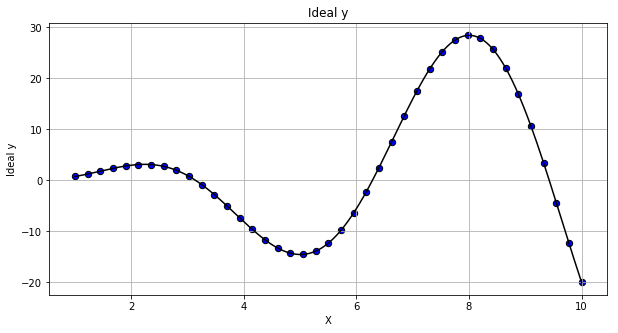

In [499]:
df.plot.scatter('X','Ideal y',title='Ideal y',grid=True,edgecolors=(0,0,0),c='blue',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

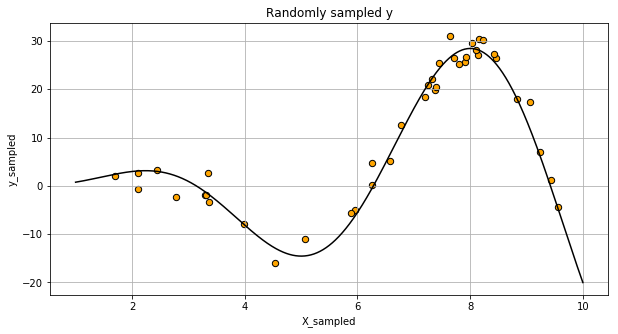

In [500]:
df.plot.scatter('X_sampled',y='y_sampled',title='Randomly sampled y',
                grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

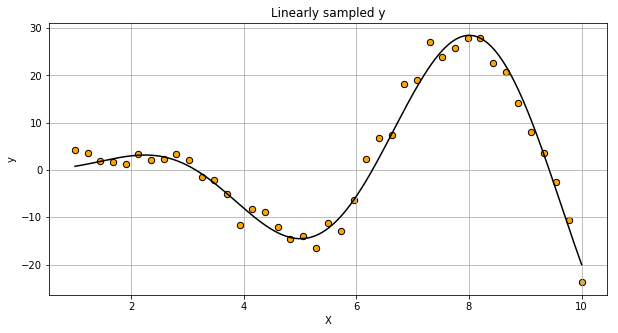

In [501]:
df.plot.scatter('X',y='y',title='Linearly sampled y',grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

### Import scikit-learn librares and prepare train/test splits

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

In [503]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

### Polynomial model with Ridge regularization (pipelined) with lineary spaced samples
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

Test score of model with degree 2: -0.11348360892695265

Test score of model with degree 3: 0.504603866711473



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 4: 0.7174543737196992

Test score of model with degree 5: 0.7975588119855959



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 6: 0.827892614565347

Test score of model with degree 7: 0.8092111826746142



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 8: 0.7756969967238383



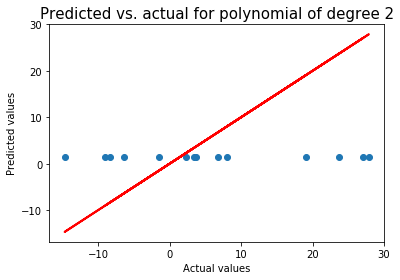

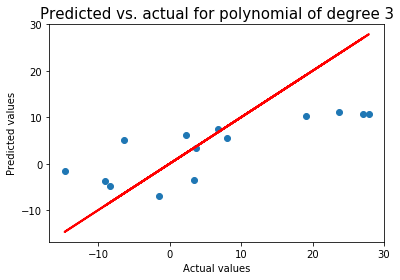

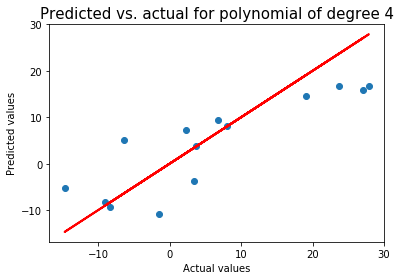

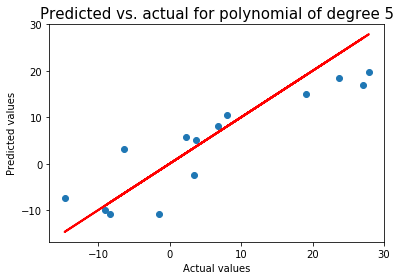

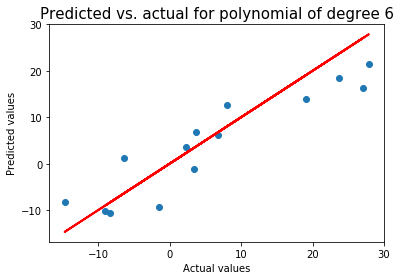

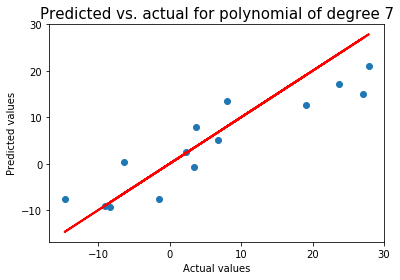

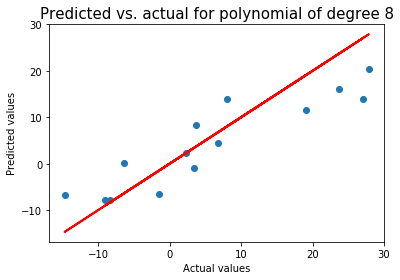

In [504]:
linear_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    #model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  max_iter=lasso_iter,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    linear_sample_score.append(test_score)
    poly_degree.append(degree)
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [505]:
linear_sample_score

[-0.11348360892695265,
 0.50460386671147295,
 0.71745437371969922,
 0.79755881198559586,
 0.82789261456534702,
 0.80921118267461423,
 0.77569699672383829]

### Modeling with randomly sampled data set

In [506]:
X_train, X_test, y_train, y_test = train_test_split(df['X_sampled'], df['y_sampled'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

Test score of model with degree 2: 0.2759400614671119

Test score of model with degree 3: 0.3940634513806749



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 4: 0.6729098732574299

Test score of model with degree 5: 0.8248829354980263



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 6: 0.8865183239634832

Test score of model with degree 7: 0.9074691984776769



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Test score of model with degree 8: 0.9054567438776545



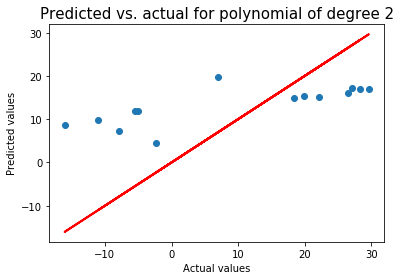

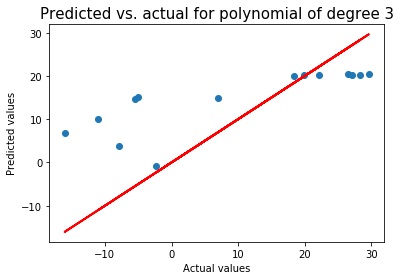

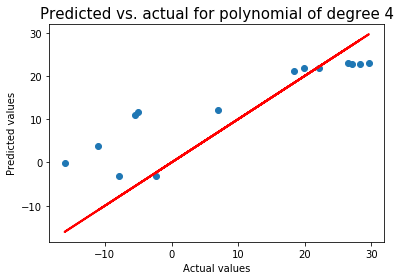

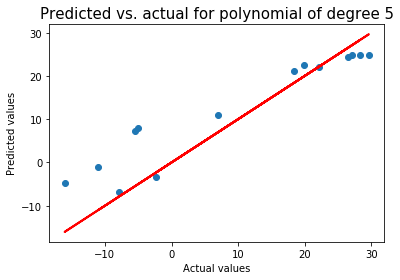

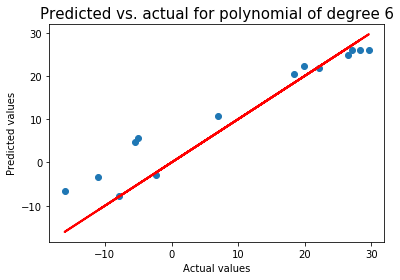

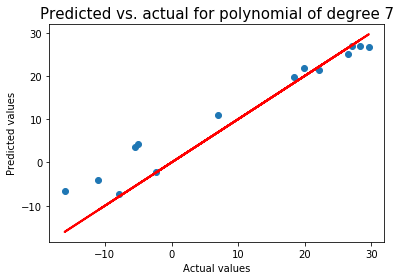

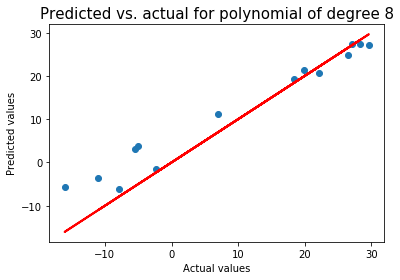

In [507]:
random_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    #model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  max_iter=lasso_iter,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    random_sample_score.append(test_score)
    poly_degree.append(degree)
    
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [508]:
random_sample_score

[0.27594006146711192,
 0.39406345138067489,
 0.6729098732574299,
 0.82488293549802627,
 0.88651832396348318,
 0.90746919847767693,
 0.90545674387765451]

In [509]:
df_score = pd.DataFrame(data={'degree':[d for d in range(degree_min,degree_max+1)],
                              'Linear sample score':linear_sample_score,
                              'Random sample score':random_sample_score})
df_score

,Linear sample score,Random sample score,degree
0,-0.113484,0.275940,2
1,0.504604,0.394063,3
2,0.717454,0.672910,4
3,0.797559,0.824883,5
4,0.827893,0.886518,6
5,0.809211,0.907469,7
6,0.775697,0.905457,8


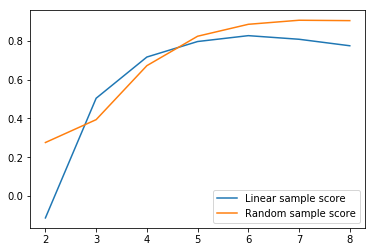

In [510]:
plt.figure()
plt.plot(df_score['degree'],df_score['Linear sample score'])
plt.plot(df_score['degree'],df_score['Random sample score'])
plt.legend()

In [511]:
m=model.steps[1][1]
m.alpha_

0.0021462553370106521